<a href="https://colab.research.google.com/github/yashowardhansinghtomar/Practicing-KMeans/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
x = df['Age']
y = df['Spending Score (1-100)']

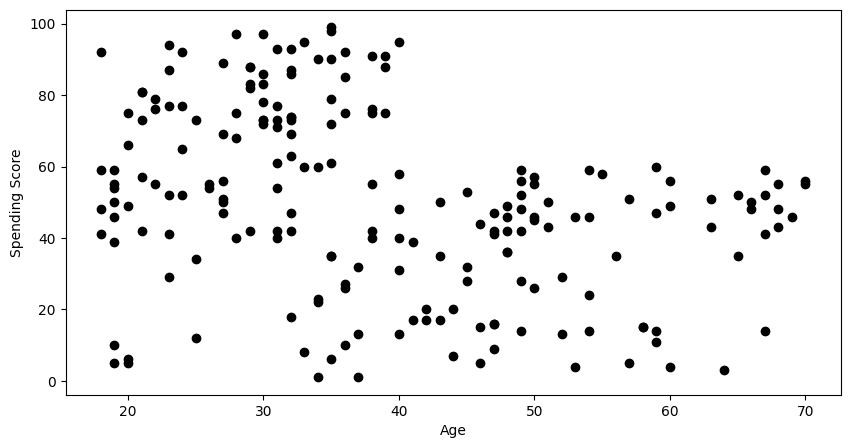

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(x,y, c='k')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

To get x and y values together as list of tuples or list of lists.

In [ ]:
#X = df.iloc[:, [2,4]].values
X = list(zip(x,y))
X[:3]

[(19, 39), (21, 81), (20, 6)]

Let's try K (number of clusters) value from 1 to 15 and find the optimal value with Elbow method.

For each value of K,  WCSS ( Within-Cluster Sum of Square) is to be calculated. \
WCSS is the sum of squared distance between each point and the centroid in a cluster.

Sklearn KMeans inertia_ measures how well a dataset was clustered. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia and a low number of clusters ( K ).

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

wcss = []
k_values = range(1,16)  # K clusters from 1 to 15
for K in k_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Plots number of Clusters vs WCSS

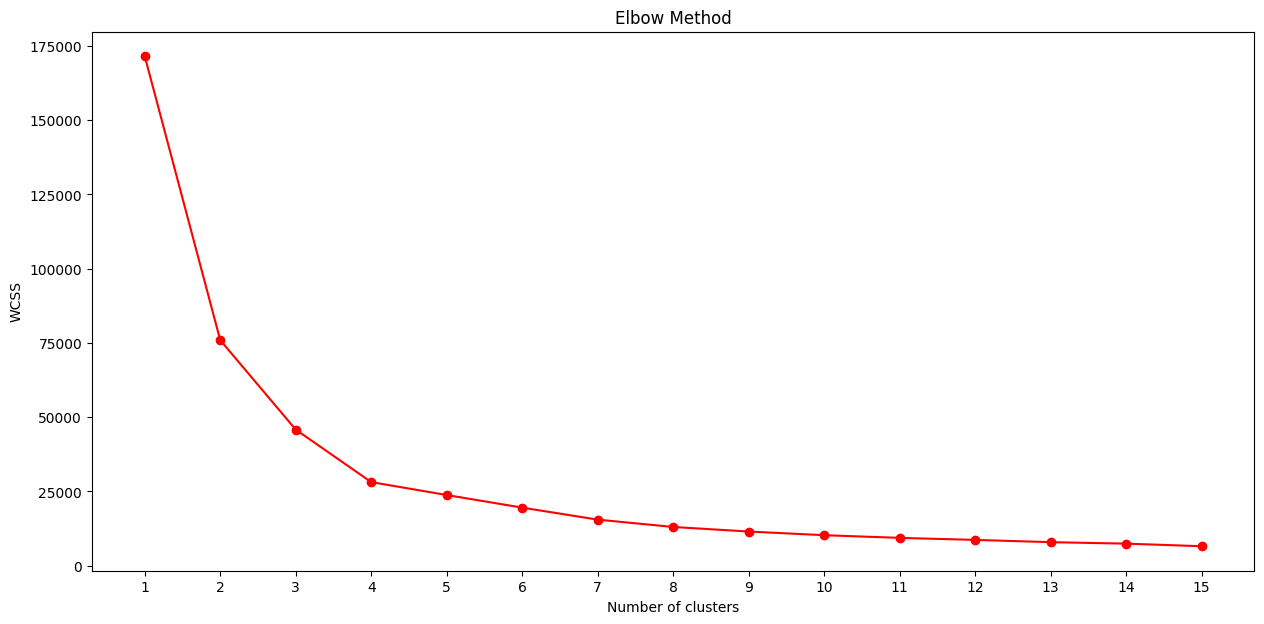

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(k_values, wcss, c='r', marker='o')
plt.xticks(k_values)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

The graph appears to be like an arm, the elbow point is the optimal value of K, after which WCSS value decreases significantly. \
Hence, K = 4 looks to be optimal.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


In [ ]:
cluster = kmeans.predict(X)
cluster

array([3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [ ]:
clusters = df[['Age', 'Spending Score (1-100)']]
clusters['Cluster'] = cluster
clusters.head()

,Age,Spending Score (1-100),Cluster
0,19,39,3
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,3


In [ ]:
clusters['Cluster'].value_counts()

0    57
1    48
2    48
3    47
Name: Cluster, dtype: int64

In [ ]:
# sort by cluster
clusters = clusters.sort_values(by='Cluster')
clusters.sample(3)

,Age,Spending Score (1-100),Cluster
57,69,46,2
9,30,72,0
33,18,92,0


In [ ]:
labels = ["Cluster "+str(c+1) for c in clusters['Cluster']]
set(labels)

{'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'}

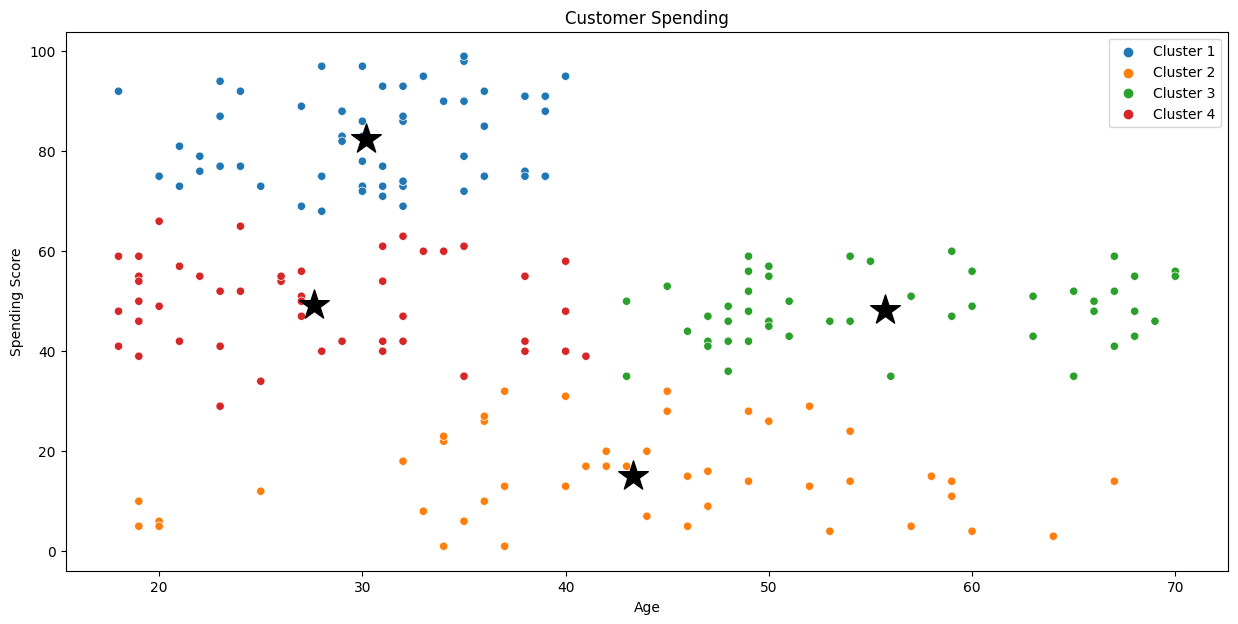

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(figsize=(15,7))
# plot clusters
sns.scatterplot(x=clusters['Age'], y=clusters['Spending Score (1-100)'], ax=axes, hue=labels, legend='full')
# plot centroid
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, c='k', label='Centroids')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Spending")
plt.show()

Thus, we can see that our model has identified 4 clusters, which means that we had data for 4 different types of customers.